<a href="https://colab.research.google.com/github/LJFHendriks/ReinforcementProject/blob/master/DQN_Lunar_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update && apt-get install swig cmake
!pip install setuptools==65.5.0
!apt-get install -y xvfb x11-utils
!pip install box2d-py
!pip install "stable-baselines3[extra]>=2.0.0a4"

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:11 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [2,270 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/restricted amd64 Packages [2,408 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InReleas

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-xkb-utils
  xfonts-base xfonts-encodings xfonts-utils xserver-common
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-utils
  x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 12 newly installed, 0 to remove and 25 not upgraded.
Need to get 7,920 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu f

In [ ]:
import gymnasium as gym
import matplotlib.pyplot as plt
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
import os


hyperparams = {
    "learning_rate": 6.3e-4,
    "batch_size": 128,
    "buffer_size": 50000,
    "learning_starts": 0,
    "gamma": 0.99,
    "target_update_interval": 250,
    "train_freq": 4,
    "gradient_steps": -1,
    "exploration_fraction": 0.12,
    "exploration_final_eps": 0.1,
    "policy_kwargs": dict(net_arch=[256, 256])
}

# Create environment
env = gym.make("LunarLander-v2", render_mode="rgb_array")

# Wrap the environment with a Monitor to log the results
log_dir = "/logs/"
os.makedirs(log_dir, exist_ok=True)
env = Monitor(env, log_dir)

# Instantiate the agent
model = DQN("MlpPolicy", env, **hyperparams, verbose=1)

# Train the agent
model.learn(total_timesteps=int(1e6),  progress_bar=True)

# Save the agent
model.save("dqn_lunar")
del model  # delete trained model to demonstrate loading





 100% ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 999,997/1,000,000  [ 3:16:30 < 0:00:01 , 82 it/s ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wrapping the env in a DummyVecEnv.
Mean reward: 228.77 +/- 33.35


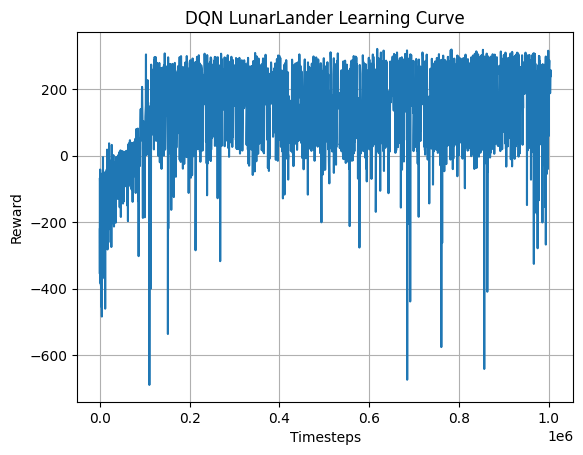

In [ ]:
# Load the trained agent
from google.colab.patches import cv2_imshow
from stable_baselines3.common.results_plotter import load_results, ts2xy
# Load the trained agent
model = DQN.load("dqn_lunar", env=env)

# Evaluate the agent
mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f"Mean reward: {mean_reward:.2f} +/- {std_reward:.2f}")

# Load the results from the log directory
timesteps, rewards = ts2xy(load_results(log_dir), "timesteps")

#x = x[len(x) - len(y) :]

# Plot the learning curve
plt.plot(timesteps, rewards)
plt.title("DQN LunarLander Learning Curve")
plt.xlabel("Timesteps")
plt.ylabel("Reward")
plt.grid(True)
plt.show()

# Enjoy the trained agent
#vec_env = model.get_env()
#obs = vec_env.reset()
#for i in range(1000):
#    action, _states = model.predict(obs, deterministic=True)
#    obs, rewards, dones, info = vec_env.step(action)
#    vec_env.render("human")